# Parametrická regresia
Časový priebeh prechodového javu RLC.

In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

Definovanie premenných potrebných pre výpočet. $ri$ a $li$ sú namerané hodnoty, ktoré použijeme ako prvotný odhad pri regresii.

Definovanie funkcie pre regresiu, vychádzajúc z teoretického modelu RLC obvodu.

In [41]:
ri = 234.7
li = 47e-3
C = 1.652e-9
U0 = 7.56

In [42]:
def func(t, R, L):
    R = float(R)
    L = float(L)
    global U0
    global C
    a = R/(2*L)
    b = (a**2 - 1/(L*C))**.5
    return(np.real((U0/(b*L))*np.exp(-a*t)*(np.exp(b*t)-np.exp(-b*t))/2))

Načítanie dát zo súboru.
Použijeme iba dva stĺpce a to $[t]$ a $[I]$.

In [43]:
df = pd.read_csv("RLC.csv")

Vykonávame fit.

$p0$ označuje prvotný odhad, resp. počiatočné hodnoty v algoritme.

In [44]:
p, c = curve_fit(func, df['t'], df['I'], 
                 p0=[234.7, 47e-3])

In [45]:
ti = np.linspace(0, 1e-3, 10000)

$rcParam.update$ je súhrnná funkcia pre nastavenie grafu. Využívame ju hlavne na definovanie využitia TeX notácie. Tú nasledne voláme pri $label$ argumente pri $plt.scatter$

$r'\$ \dots \$'$ je volanie po TeX notácii, pričom \$ z oboch strán ohraničuje TeX matematickú notáciu.

Ostatné verím, že je zrozumiteľné. Alternatívne kuk dokumentácia.


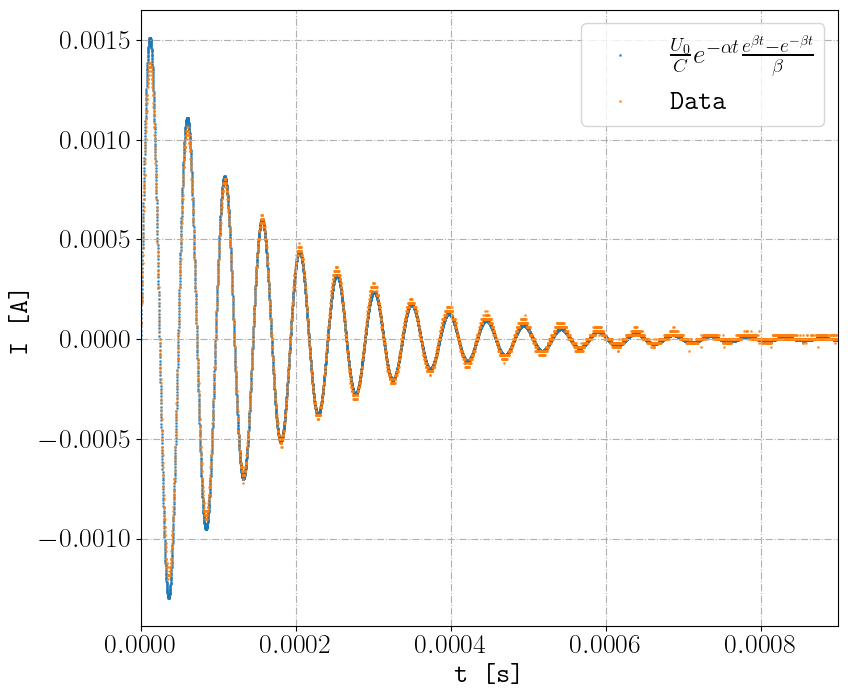

In [46]:
plt.rcParams.update(
    {'font.size': 20,
    'text.usetex':  True,
    'font.family': 'monospace'
    })

plt.figure(figsize=(9,8))
plt.grid(which="both", linestyle="dashdot")

plt.scatter(ti, func(ti, p[0], p[1]), s=1,
            alpha=0.7,
            label=r'$\frac{U_0}{C} e^{-\alpha t} \frac{ e^{\beta t}-e^{-\beta t}}{\beta} $')
plt.scatter( df['t'], df['I'], s=1, 
            alpha=0.7,
            label=r'Data')

plt.xlim(0., 9e-4)
plt.xlabel(r't [s]')
plt.ylabel(r'I [A]')

plt.legend()
plt.show()